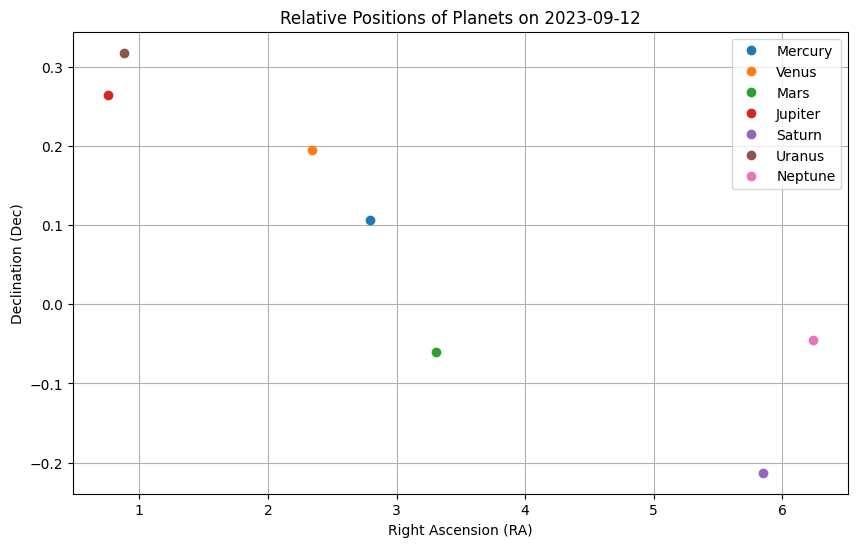

In [1]:
import ephem
import matplotlib.pyplot as plt
from datetime import datetime

# Function to calculate planet positions at a given date
def calculate_planet_positions(date):
    planet_positions = {}
    planets = ["Mercury", "Venus", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]

    observer = ephem.Observer()
    observer.lat = '0'
    observer.lon = '0'

    for planet_name in planets:
        planet = getattr(ephem, planet_name)()
        planet.compute(date)
        planet_positions[planet_name] = (planet.ra, planet.dec)

    return planet_positions

# Generating a plot of planet positions
def plot_planet_positions(date):
    planet_positions = calculate_planet_positions(date)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(f"Relative Positions of Planets on {date.strftime('%Y-%m-%d')}")

    for planet_name, (ra, dec) in planet_positions.items():
        ax.plot(ra, dec, 'o', label=planet_name)

    ax.set_xlabel("Right Ascension (RA)")
    ax.set_ylabel("Declination (Dec)")
    ax.legend()

    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    date = datetime(2023, 9, 12)
    plot_planet_positions(date)

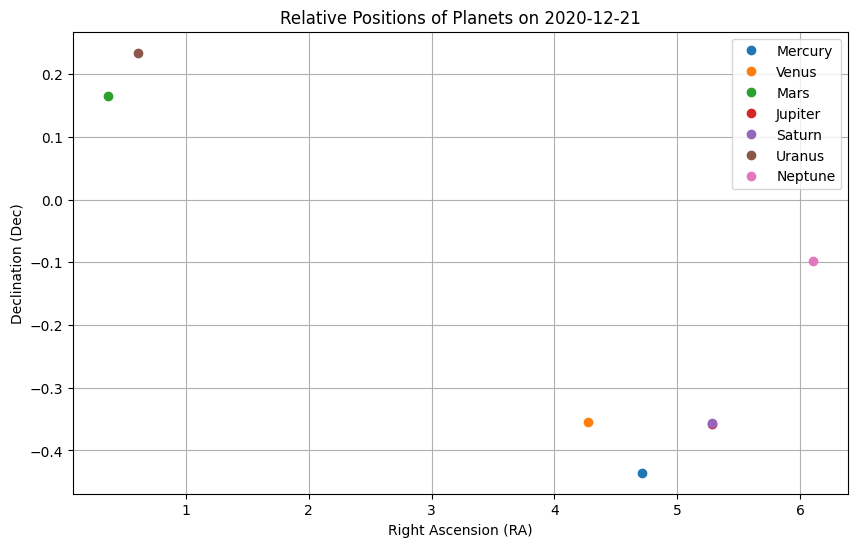

In [2]:
import ephem
import matplotlib.pyplot as plt
from datetime import datetime

# Function to calculate planet positions at a given date
def calculate_planet_positions(date):
    planet_positions = {}
    planets = ["Mercury", "Venus", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]

    observer = ephem.Observer()
    observer.lat = '0'
    observer.lon = '0'

    for planet_name in planets:
        planet = getattr(ephem, planet_name)()
        planet.compute(date)
        planet_positions[planet_name] = (planet.ra, planet.dec)

    return planet_positions

# Generating a plot of planet positions
def plot_planet_positions(date):
    planet_positions = calculate_planet_positions(date)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(f"Relative Positions of Planets on {date.strftime('%Y-%m-%d')}")

    for planet_name, (ra, dec) in planet_positions.items():
        ax.plot(ra, dec, 'o', label=planet_name)

    ax.set_xlabel("Right Ascension (RA)")
    ax.set_ylabel("Declination (Dec)")
    ax.legend()

    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # giving the date of the saturn and jupiter conjunction
    date = datetime(2020, 12, 21)
    plot_planet_positions(date)


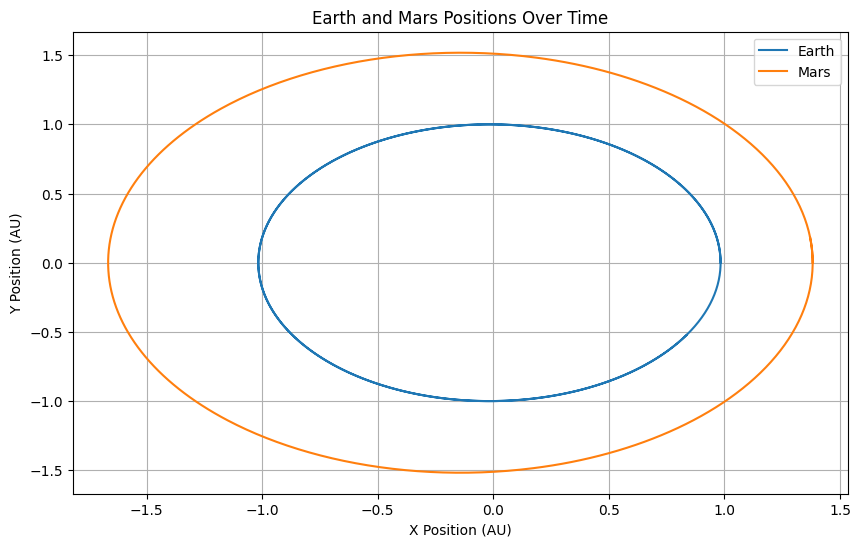

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Time span for the simulation (in days)
days = np.arange(0, 700, 1)

# Semi-major axes of Earth and Mars' orbits (in astronomical units, AU)
a_earth = 1.0
a_mars = 1.524

# Orbital periods of Earth and Mars (in days)
T_earth = 365.25
T_mars = 686.98

# Calculate the mean motion for Earth and Mars
n_earth = 2 * np.pi / T_earth
n_mars = 2 * np.pi / T_mars

# Calculate the mean anomaly for Earth and Mars
M_earth = n_earth * days
M_mars = n_mars * days

# Define a function to solve Kepler's equation for eccentric anomaly
def solve_keplers_equation(E, M, e):
    tol = 1e-5
    max_iter = 1000
    for _ in range(max_iter):
        E_new = E - (E - e * np.sin(E) - M) / (1 - e * np.cos(E))
        if abs(E_new - E) < tol:
            return E_new
        E = E_new
    return None

# Calculate the eccentric anomaly for Earth and Mars
e_earth = 0.0167  # Eccentricity of Earth's orbit
e_mars = 0.0934   # Eccentricity of Mars' orbit
E_earth = [solve_keplers_equation(0, M, e_earth) for M in M_earth]
E_mars = [solve_keplers_equation(0, M, e_mars) for M in M_mars]

# Calculate the true anomaly for Earth and Mars
v_earth = [2 * np.arctan2(np.sqrt(1 + e_earth) * np.sin(E / 2), np.sqrt(1 - e_earth) * np.cos(E / 2)) for E in E_earth]
v_mars = [2 * np.arctan2(np.sqrt(1 + e_mars) * np.sin(E / 2), np.sqrt(1 - e_mars) * np.cos(E / 2)) for E in E_mars]

# Calculate the heliocentric distances for Earth and Mars
r_earth = [a_earth * (1 - e_earth * np.cos(E)) for E in E_earth]
r_mars = [a_mars * (1 - e_mars * np.cos(E)) for E in E_mars]

# Calculate the x and y coordinates for Earth and Mars
x_earth = [r * np.cos(v) for r, v in zip(r_earth, v_earth)]
y_earth = [r * np.sin(v) for r, v in zip(r_earth, v_earth)]
x_mars = [r * np.cos(v) for r, v in zip(r_mars, v_mars)]
y_mars = [r * np.sin(v) for r, v in zip(r_mars, v_mars)]

# Plot the positions of Earth and Mars
plt.figure(figsize=(10, 6))
plt.plot(x_earth, y_earth, label='Earth')
plt.plot(x_mars, y_mars, label='Mars')
plt.xlabel('X Position (AU)')
plt.ylabel('Y Position (AU)')
plt.title('Earth and Mars Positions Over Time')
plt.legend()
plt.grid(True)
plt.show()